Logisitc Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56651
           1       0.05      0.86      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.92      0.54     56746
weighted avg       1.00      0.97      0.98     56746

ROC-AUC: 0.9616


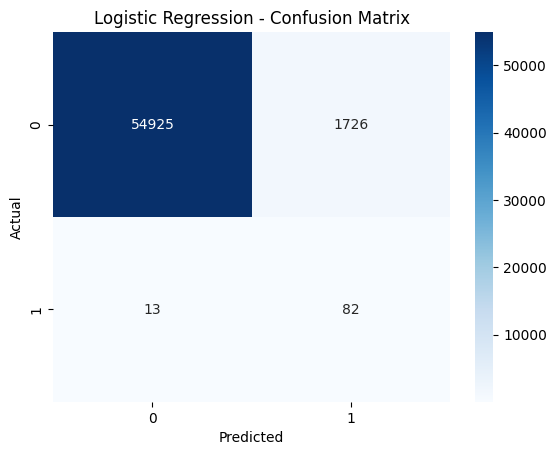

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load preprocessed dataset
df = pd.read_csv("C:\\Users\\divya\\OneDrive\\Desktop\\fraud_detection_project\\data\\interim\\feature_engineered_data.csv")

# Split into features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Handle imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train Models
model = LogisticRegression(max_iter=1000)



model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
    
print("Logisitc Regression")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


c:\Users\divya\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:47:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.80      0.81        95

    accuracy                           1.00     56746
   macro avg       0.91      0.90      0.90     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.9676


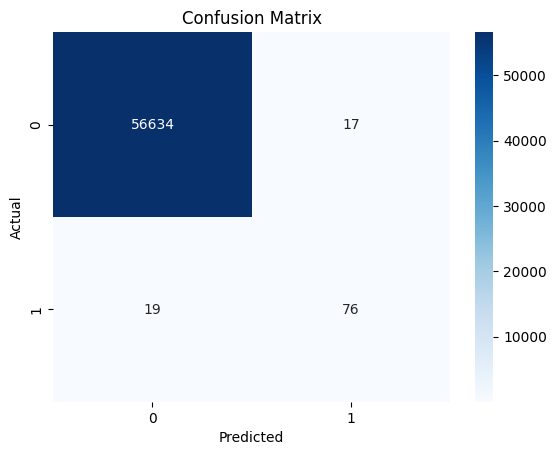

In [8]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')



model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
    
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    
    # Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
